
#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [49]:
df = pd.read_csv('vgsales.csv')
int(df['Year'].min())

1980

###  Динамика продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном графике.

In [4]:
data = df[df['Publisher'] == "Activision"][['Year', 'NA_Sales']].groupby('Year').apply(np.sum)
data1 = df[df['Publisher'] == "Activision"][['Year', 'EU_Sales']].groupby('Year').apply(np.sum)
data2 = df[df['Publisher'] == "Activision"][['Year', 'JP_Sales']].groupby('Year').apply(np.sum)
data3 = df[df['Publisher'] == "Activision"][['Year', 'Global_Sales']].groupby('Year').apply(np.sum)


data.index = data.index.astype(int)
data1.index = data1.index.astype(int)
data2.index = data1.index.astype(int)
data3.index = data1.index.astype(int)

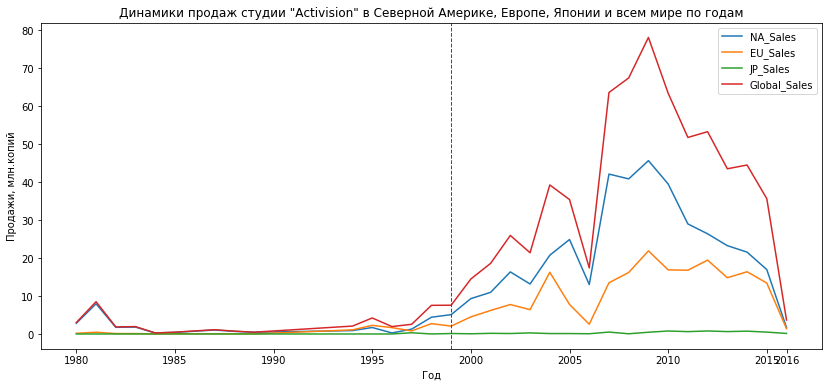

In [74]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(data.index, data['NA_Sales'], label='NA_Sales')
ax.plot(data1.index, data1['EU_Sales'], label='EU_Sales')
ax.plot(data2.index, data2['JP_Sales'], label='JP_Sales')
ax.plot(data3.index, data3['Global_Sales'], label='Global_Sales')


ax.axvline(x=1999, color='green', linewidth=1, linestyle='--')

ax.set_title('Динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн.копий')
ax.set_xticks(list(range(data.index.min(), data.index.max(), 5)) + [data.index.max()])


ax.legend()
                   
plt.show()

###  Линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире.

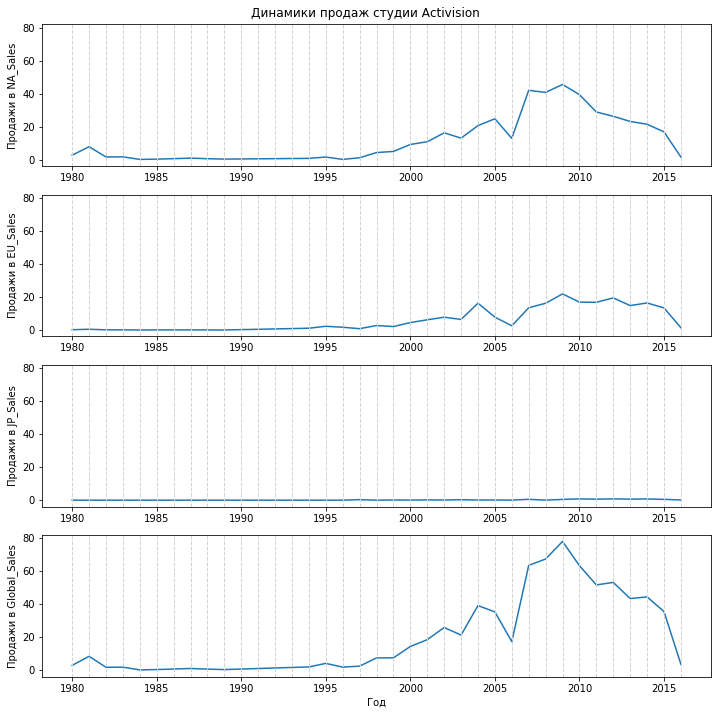

In [63]:

fig, axs = plt.subplots(figsize=(12, 12), nrows=4,sharey = True)
country_sales = ['NA_Sales', 'EU_Sales','JP_Sales','Global_Sales']

for i in range(len(country_sales)):
        data_act = df[df['Publisher'] == "Activision"][["Year", country_sales[i]]].groupby('Year').apply(np.sum)
        data_act.index =  data_act.index.astype(int)
        ax = axs[i]
        ax.plot(data_act.index, data_act[country_sales[i]], label=country_sales[i])

        ax.set_ylabel('Продажи в ' + country_sales[i])
    
        if i == len(country_sales) - 1:
            ax.set_xlabel('Год')

for bin_ in (list(range(data_act.index.min(), data_act.index.max())) + [data_act.index.max()]):
    for ax in axs:
        ax.axvline(x=bin_, color='lightgray', linewidth=1, linestyle='--')
        
fig.suptitle("Динамики продаж студии Activision", y=0.9)
plt.show()


### Графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика.

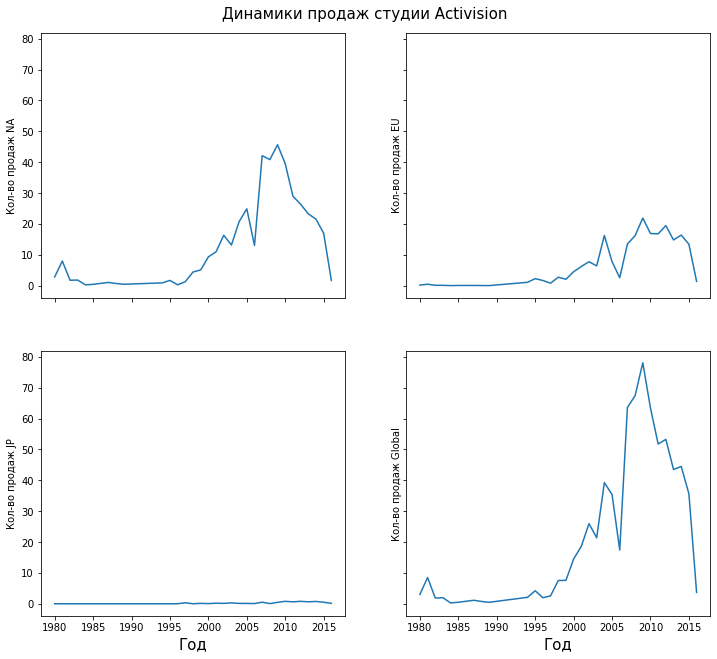

In [9]:
#как построить axvline для сетки 2х2? 
fig, axs = plt.subplots(figsize=(12, 12), ncols=2, nrows=2, sharex=True,sharey = True)
fig.subplots_adjust(top=0.8)
data = df[df['Publisher'] == "Activision"][['Year', 'NA_Sales']].groupby('Year').apply(np.sum)
data1 = df[df['Publisher'] == "Activision"][['Year', 'EU_Sales']].groupby('Year').apply(np.sum)
data2 = df[df['Publisher'] == "Activision"][['Year', 'JP_Sales']].groupby('Year').apply(np.sum)
data3 = df[df['Publisher'] == "Activision"][['Year', 'Global_Sales']].groupby('Year').apply(np.sum)


data.index = data.index.astype(int)
data1.index = data1.index.astype(int)
data2.index = data1.index.astype(int)
data3.index = data1.index.astype(int)


axs[0,0].plot(data.index, data['NA_Sales'])
axs[0,1].plot(data1.index, data1['EU_Sales'])
axs[1,0].plot(data2.index, data2['JP_Sales'])
axs[1,1].plot(data3.index, data3['Global_Sales'])


fig.suptitle('Динамики продаж студии Activision',y = 0.83, fontsize = 15)


axs[0,0].set_ylabel('Кол-во продаж NA')


axs[0,1].set_ylabel('Кол-во продаж EU')


axs[1,0].set_ylabel('Кол-во продаж JP')
axs[1,0].set_xlabel('Год',y = 10, fontsize = 15)

axs[1,1].set_xlabel('Год',y = 10, fontsize = 15)
axs[1,1].set_ylabel('Кол-во продаж Global')


plt.show()

### Гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). 

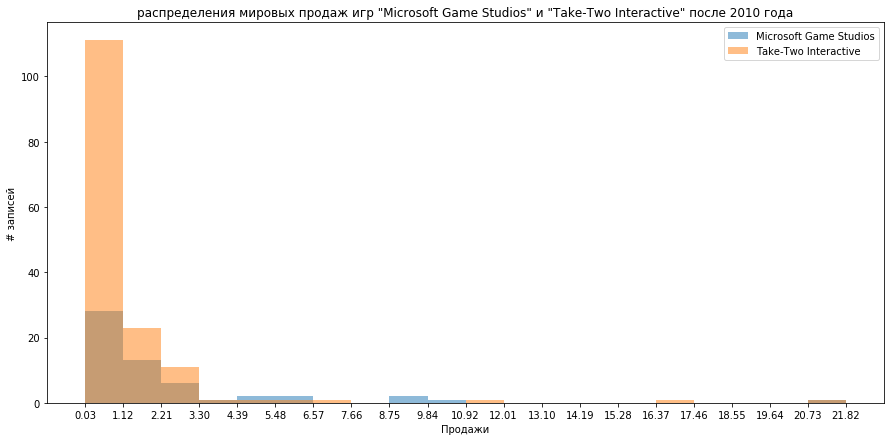

In [78]:
data_mgs = df[(df['Publisher'] == "Microsoft Game Studios") & (df['Year'] >= 2010)]['Global_Sales']
data_tti = df[(df['Publisher'] == "Take-Two Interactive") & (df['Year'] >= 2010)]['Global_Sales']

fig, ax = plt.subplots(figsize=(15, 7),sharex=True) #sharey = True) 
_, bins, _ = ax.hist(data_mgs, label = 'Microsoft Game Studios',alpha=0.5, bins=20)
ax.hist(data_tti,label = "Take-Two Interactive", alpha=0.5, bins=bins)

#axs[0].set_xticks(bins1)
#axs[1].set_xticks(bins1)

ax.set_title('распределения мировых продаж игр "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года')
ax.set_ylabel('# записей')
ax.set_xlabel('Продажи')
ax.set_xticks(bins)
ax.legend()


plt.show()


### Линейный график динамики количества игр, выпускаемых Nintendo, по годам. 

In [91]:
df_nintendo = df[df["Publisher"] == 'Nintendo'][['Year',"Name"]].groupby('Year').count()

In [92]:
df_nintendo.index = df_nintendo.index.astype(int)

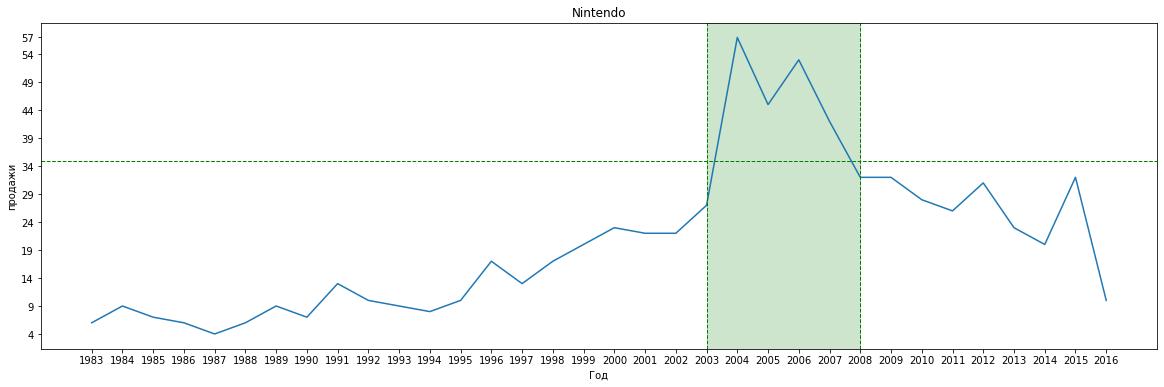

In [93]:
fig, ax = plt.subplots(figsize=(20,6))


ax.axvspan(xmin=2003, xmax=2008, color='green', alpha=0.2) 
ax.plot(df_nintendo.index, df_nintendo['Name'])
ax.axhline(y=35, color='green', linewidth=1, linestyle='--')
ax.axvline(x=2003, color='green', linewidth=1, linestyle='--')
ax.axvline(x=2008, color='green', linewidth=1, linestyle='--')

ax.set_title('Nintendo')
ax.set_xlabel('Год')
ax.set_ylabel("продажи")
ax.set_xticks(list(range(df_nintendo.index.min(), df_nintendo.index.max(), 1)) + [df_nintendo.index.max()])
ax.set_yticks(list(range(df_nintendo['Name'].min(), df_nintendo['Name'].max(), 5)) + [df_nintendo['Name'].max()])

plt.show()

###  3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Сетку графиков 4 на 3, в каждой ячейке построен точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). 

In [4]:
df_pub = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

In [5]:
df_pub = df_pub.loc[0:3]
df_pub

,Publisher,Global_Sales
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50


In [18]:
df_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

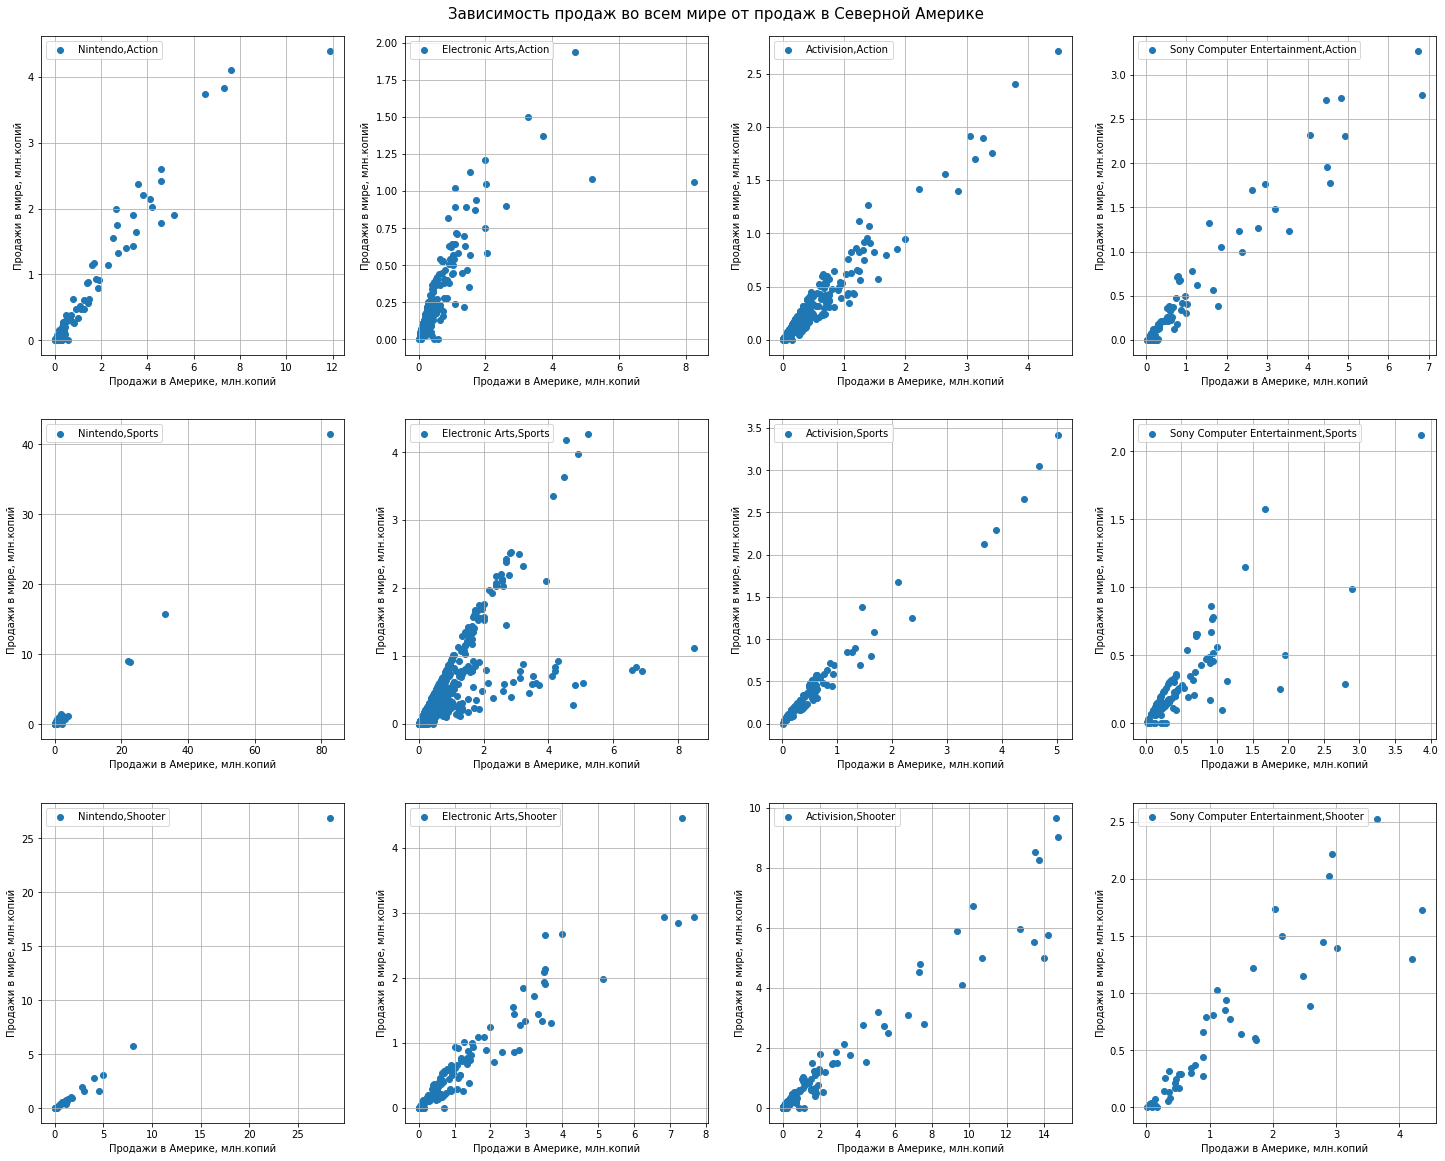

In [33]:
fig, axes = plt.subplots(figsize=(25,20), ncols = 4, nrows = 3)


Publisher = ['Nintendo','Electronic Arts','Activision','Sony Computer Entertainment']
Genre = ['Action','Sports','Shooter']

for i in range(0,4):
    for j in range(0,3):
            ax = axes [j][i]
            data_GS = df[(df['Publisher'] == Publisher[i]) &(df['Genre'] == Genre[j])][['Global_Sales']]
            data_NA = df[(df['Publisher'] == Publisher[i]) & (df['Genre'] == Genre[j])][['NA_Sales']]
    
            ax.scatter(data_GS, data_NA,label=f'{Publisher[i]},{Genre[j]}')
            ax.set_xlabel("Продажи в Америке, млн.копий")
            ax.set_ylabel("Продажи в мире, млн.копий")
            ax.grid()
            ax.legend()
            
fig.suptitle("Зависимость продаж во всем мире от продаж в Северной Америке" ,y = 0.9, fontsize = 15) 

plt.show()            